# Universidad Libre - Seccional Cali<br>Facultad de Ingeniería - Diplomado en Ciencia de Datos<br>(ↄ) Diego Fernando Marin, 2024

## Datos del Estudiante:

**Nombre**: Daniel Felipe Quintero Jimenez y Sebastian Guiterrez Clavijo<br>
**Correo**: danielf-quinteroj@unilibre.edu.co y sebastian-guiterrezc@unilibre.edu.co

# Taller #2 - Heroes

In [7]:
import requests

# URL del archivo
url = "https://paste.c-net.org/TestedRenewal"

# Nombre del archivo de salida
output_file = "heroes.csv"

# Descargar el archivo
response = requests.get(url)

# Guardar el contenido en un archivo
if response.status_code == 200:
    with open(output_file, "wb") as file:
        file.write(response.content)
    print(f"Archivo guardado como {output_file}")
else:
    print(f"Error al descargar el archivo: {response.status_code}")



Archivo guardado como heroes.csv


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('heroes.csv', sep=';')

## 1. ¿Cuántas filas y columnas tiene el DataFrame?

In [46]:
df.shape

(735, 13)

## 2. Muestra los nombres de todas las columnas del DataFrame.

In [60]:
df.columns

Index(['Name', 'Identity', 'Birth place', 'Publisher', 'Height', 'Weight',
       'Gender', 'First appearance', 'Eye color', 'Hair color', 'Strength',
       'Intelligence'],
      dtype='object')

## 3. ¿Cuál es el tipo de dato de cada columna?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              735 non-null    object 
 1   Identity          632 non-null    object 
 2   Birth place       317 non-null    object 
 3   Publisher         720 non-null    object 
 4   Height            518 non-null    float64
 5   Weight            498 non-null    float64
 6   Gender            706 non-null    object 
 7   First appearance  367 non-null    float64
 8   Eye color         563 non-null    object 
 9   Hair color        563 non-null    object 
 10  Strength          609 non-null    float64
 11  Intelligence      609 non-null    object 
dtypes: float64(4), object(8)
memory usage: 69.0+ KB


## 4. ¿Cuántos superhéroes únicos hay en el dataset?

In [14]:
# Contar el número de superhéroes únicos
unique_heroes_count = df['Name'].nunique()
unique_heroes_count

717

## 5. ¿Cuál es la altura promedio de los superhéroes?

In [15]:
 # Convertir la columna 'Height' a numérica para calcular la altura promedio

average_height = df['Height'].mean()
average_height

np.float64(187.2350772200772)

## 6. ¿Cuál es el superhéroe más pesado?

In [16]:
heaviest_hero = df.loc[df['Weight'].idxmax(), 'Name']
heaviest_hero


'Sasquatch'

## 7. ¿Cuántos superhéroes son de género masculino y cuántos de género femenino?

In [18]:
gender_counts = df['Gender'].value_counts()
male_count = gender_counts.get('M', 0)
female_count = gender_counts.get('F', 0)

male_count, female_count


(np.int64(506), np.int64(200))

## 8. ¿Cuál es el color de ojos más común entre los superhéroes?

In [19]:
most_common_eye_color = df['Eye color'].mode()[0]
most_common_eye_color


'Blue'

## 9. Crea un gráfico de barras que muestre la distribución de los colores de cabello.

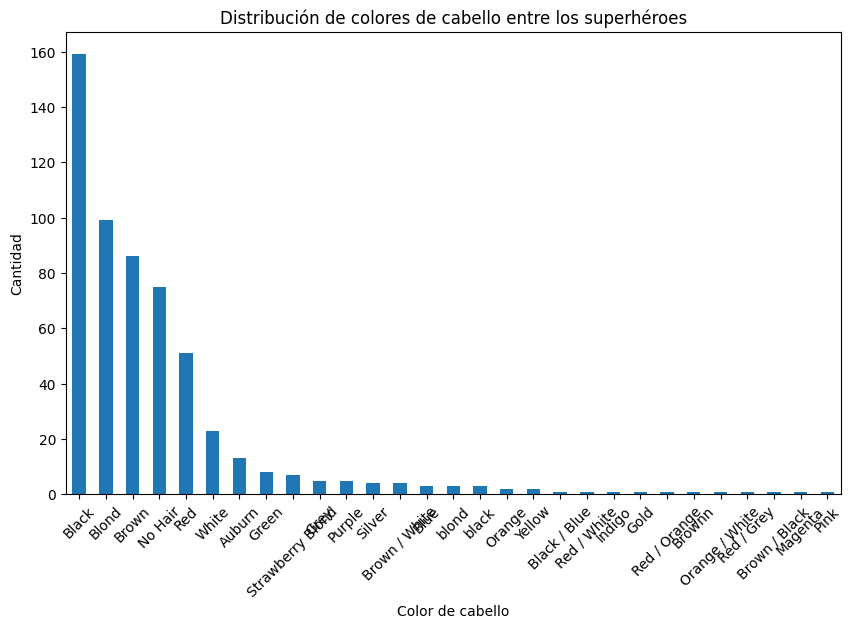

In [21]:
hair_color_counts = df['Hair color'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
hair_color_counts.plot(kind='bar')
plt.title('Distribución de colores de cabello entre los superhéroes')
plt.xlabel('Color de cabello')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

## 10. ¿Cuál es la mediana de la fuerza de los superhéroes?

In [22]:
strength_median = df['Strength'].median()
strength_median


np.float64(35.0)

## 11. Crea una nueva columna llamada 'BMI' que calcule el índice de masa corporal de los superhéroes.

In [23]:
# Convertir Height a metros y Weight a kilogramos si es necesario
df['Height_m'] = df['Height'] / 100  # Convertir cm a m
df['BMI'] = df['Weight'] / (df['Height_m'] ** 2)
df['BMI']


0      107.024446
1             NaN
2      107.211015
3             NaN
4       20.295282
          ...    
730     27.725061
731     26.236367
732     27.309736
733     24.245355
734           NaN
Name: BMI, Length: 735, dtype: float64

## 12. ¿Existe alguna correlación entre la altura y el peso de los superhéroes? Visualízalo con un gráfico de dispersión.

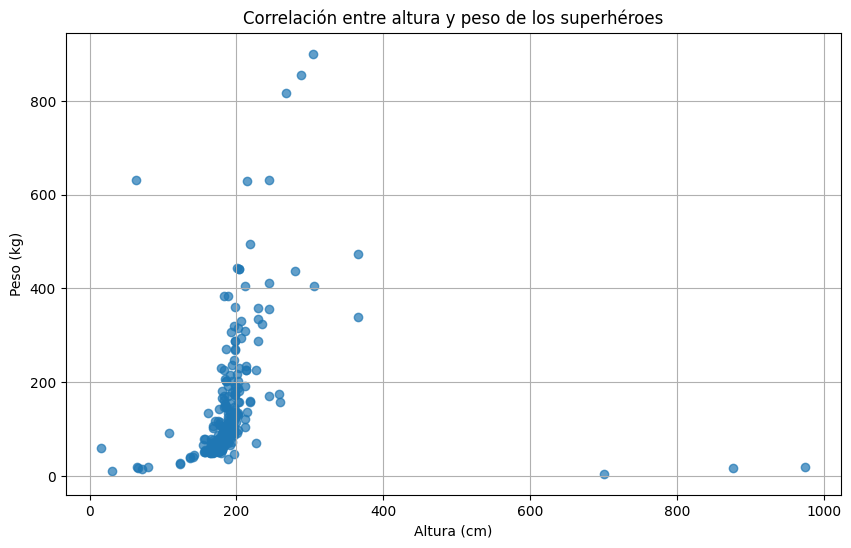

In [25]:
# Crear un gráfico de dispersión para visualizar la correlación entre altura y peso
plt.figure(figsize=(10, 6))
plt.scatter(df['Height'], df['Weight'], alpha=0.7)
plt.title('Correlación entre altura y peso de los superhéroes')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.grid(True)
plt.show()


## 13. Agrupa los superhéroes por editorial (Publisher) y calcula la altura promedio para cada grupo.

In [26]:
average_height_by_publisher = df.groupby('Publisher')['Height'].mean()
average_height_by_publisher


Publisher
ABC Studios                 NaN
DC Comics            181.424762
Dark Horse Comics    177.421818
George Lucas         184.294167
Hanna-Barbera               NaN
HarperCollins               NaN
IDW Publishing              NaN
Icon Comics                 NaN
Image Comics         211.500000
J. K. Rowling               NaN
J. R. R. Tolkien     279.900000
Marvel Comics        191.032191
Microsoft            213.920000
NBC - Heroes                NaN
Rebellion            188.090000
Shueisha             172.052500
Sony Pictures        179.665000
South Park                  NaN
Star Trek            182.275000
SyFy                        NaN
Team Epic TV         182.544000
Titan Books          183.690000
Universal Studios           NaN
Wildstorm                   NaN
Name: Height, dtype: float64

## 14. ¿En qué año apareció por primera vez el superhéroe más antiguo del dataset?

In [32]:
# Convertir la columna 'First appearance' a datetime
df['First appearance'] = pd.to_datetime(df['First appearance'], errors='coerce')

# Encontrar el año más antiguo de primera aparición
oldest_hero_year = df['First appearance'].min().year
oldest_hero_year


1970

## 15. Crea un gráfico de caja (boxplot) para visualizar la distribución de la inteligencia de los superhéroes.

In [50]:
# Mostrar los valores únicos en la columna 'Intelligence'
unique_intelligence_values = df['Intelligence'].unique()
unique_intelligence_values

array([nan])

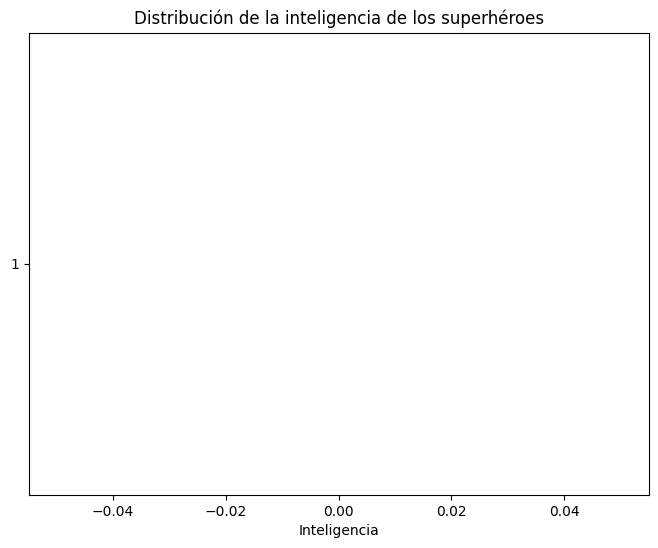

In [49]:
# Crear un gráfico de caja para la inteligencia
df['Intelligence'] = pd.to_numeric(df['Intelligence'], errors='coerce')  # Asegurarse de que los datos sean numéricos
plt.figure(figsize=(8, 6))
plt.boxplot(df['Intelligence'].dropna(), vert=False)
plt.title('Distribución de la inteligencia de los superhéroes')
plt.xlabel('Inteligencia')
plt.show()


## 16. Realiza un análisis de valores faltantes en el dataset. ¿Qué columnas tienen más valores faltantes?

In [53]:
# Análisis de valores faltantes en el dataset
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percentage = (missing_values / len(df)) * 100

# Combinar resultados en un DataFrame para mejor visualización
missing_analysis = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage Missing': missing_values_percentage.values
})

print(missing_analysis)



              Column  Missing Values  Percentage Missing
0       Intelligence             735          100.000000
1               Hola             734           99.863946
2        Birth place             418           56.870748
3   First appearance             368           50.068027
4             Weight             237           32.244898
5             Height             217           29.523810
6         Hair color             172           23.401361
7          Eye color             172           23.401361
8           Strength             126           17.142857
9           Identity             103           14.013605
10            Gender              29            3.945578
11         Publisher              15            2.040816
12              Name               0            0.000000


## 17. Crea una función que categorice la fuerza de los superhéroes en 'Baja', 'Media' y 'Alta' basándote en los percentiles 33 y 66.

In [54]:
def categorize_strength(df, column='Strength'):
    # Calcular los percentiles 33 y 66
    lower_threshold = df[column].quantile(0.33)
    upper_threshold = df[column].quantile(0.66)
    
    # Categorizar la fuerza
    def categorize(value):
        if pd.isna(value):
            return 'Desconocida'
        elif value <= lower_threshold:
            return 'Baja'
        elif value <= upper_threshold:
            return 'Media'
        else:
            return 'Alta'
    
    # Crear una nueva columna con las categorías
    df['Strength Category'] = df[column].apply(categorize)
    return df

# Aplicar la función al DataFrame
df = categorize_strength(df)
df[['Name', 'Strength', 'Strength Category']]


,Name,Strength,Strength Category
0,A-Bomb,100.0,Alta
1,Abraxas,100.0,Alta
2,Abomination,80.0,Alta
3,Adam Monroe,10.0,Baja
4,Agent 13,NaN,Desconocida
...,...,...,...
730,Alan Scott,80.0,Alta
731,Amazo,100.0,Alta
732,Ant-Man,20.0,Media
733,Ajax,50.0,Media


## 18. Genera un heatmap que muestre la correlación entre las variables numéricas del dataset.

In [57]:
import seaborn as sns

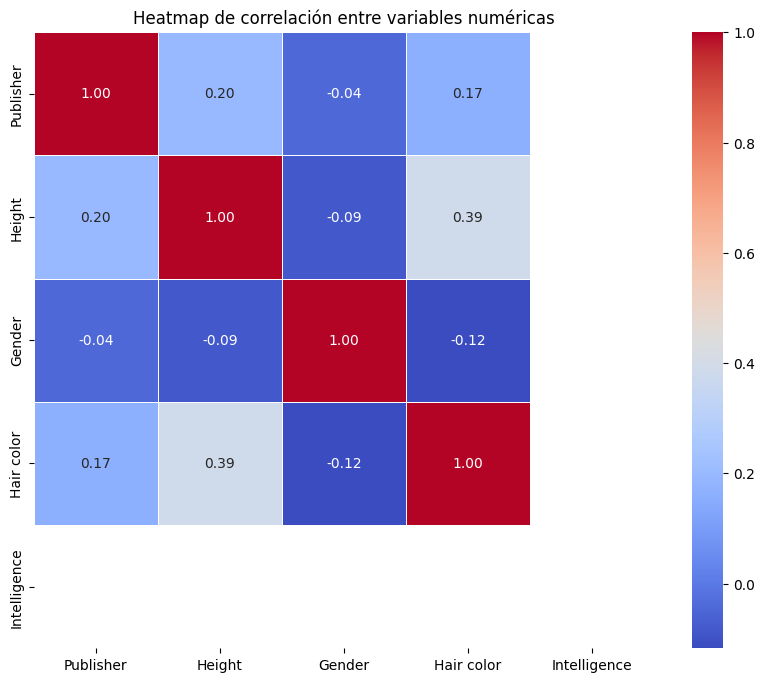

In [61]:
# Seleccionar solo las columnas numéricas del dataset
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de correlación entre variables numéricas')
plt.show()

## 19. ¿Existe alguna relación entre el color de ojos y la fuerza de los superhéroes? Visualízalo con un gráfico apropiado.

In [64]:
duplicate_indices = df.index.duplicated().sum()
print(f"Número de índices duplicados: {duplicate_indices}")


Número de índices duplicados: 18


In [66]:
df = df.reset_index(drop=True)
duplicate_columns = df.columns.duplicated().sum()
print(f"Número de columnas duplicadas: {duplicate_columns}")



Número de columnas duplicadas: 0


C:\Users\Dani\AppData\Local\Temp\ipykernel_10344\752632986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Eye color', y='Strength', data=df, palette='viridis')


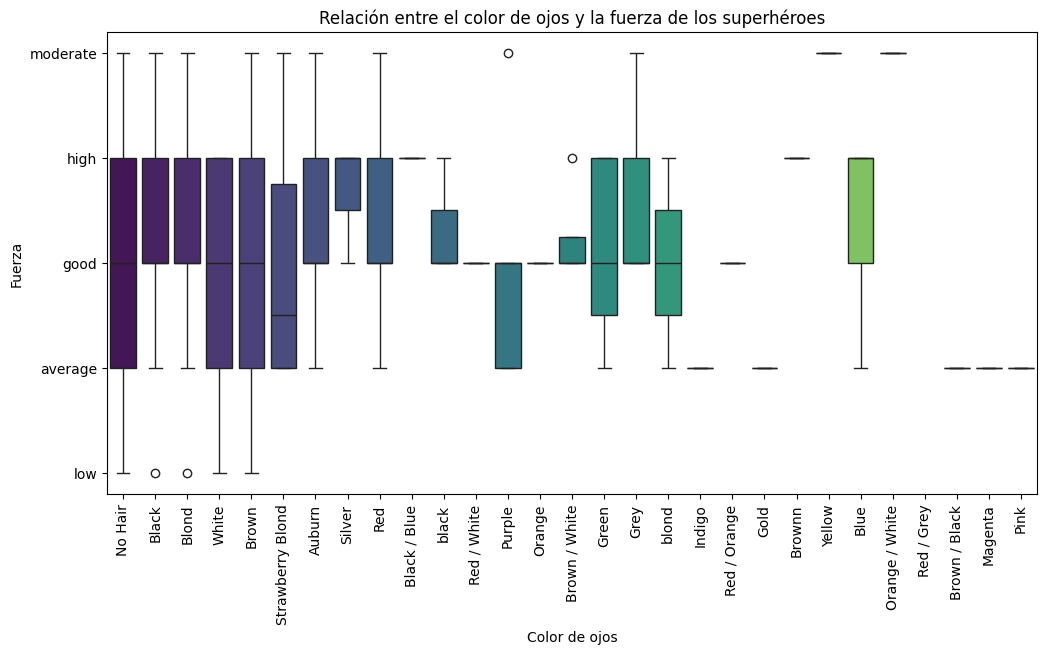

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Eye color', y='Strength', data=df, palette='viridis')
plt.title('Relación entre el color de ojos y la fuerza de los superhéroes')
plt.xlabel('Color de ojos')
plt.ylabel('Fuerza')
plt.xticks(rotation=90)
plt.show()


## 20. Crea un gráfico de violín que compare la distribución de alturas entre superhéroes masculinos y femeninos.

C:\Users\Dani\AppData\Local\Temp\ipykernel_10344\1039593680.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Height', data=df, palette='muted', split=True)


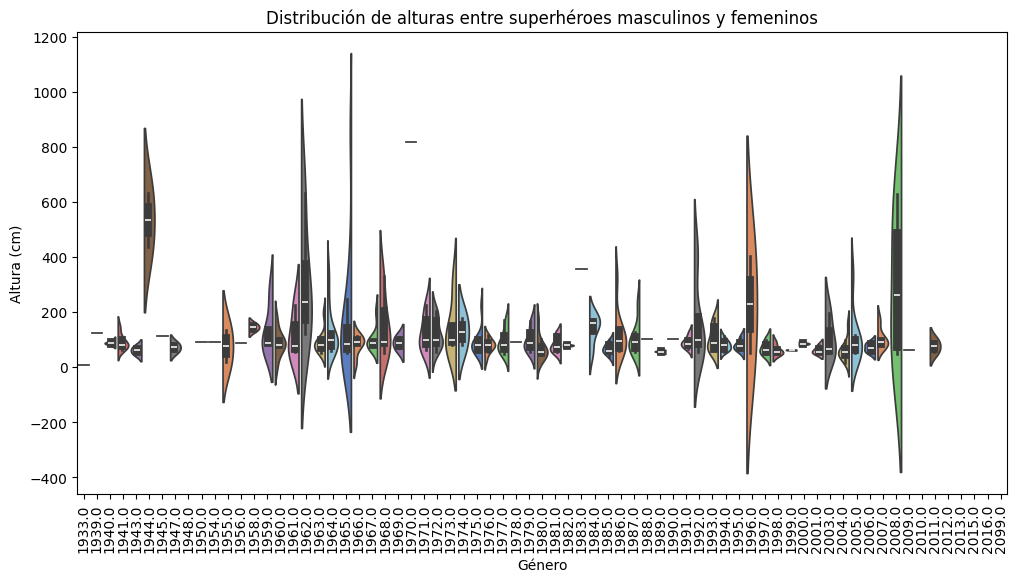

In [70]:
# Crear un gráfico de violín para comparar la distribución de alturas entre géneros
plt.figure(figsize=(12, 6))
sns.violinplot(x='Gender', y='Height', data=df, palette='muted', split=True)
plt.title('Distribución de alturas entre superhéroes masculinos y femeninos')
plt.xlabel('Género')
plt.ylabel('Altura (cm)')
plt.xticks(rotation=90)
plt.show()


## 21. Utiliza la función `pd.melt()` para reestructurar el DataFrame, colocando las características (fuerza, inteligencia, etc.) en una sola columna. Luego, crea un gráfico que compare estas características entre los 5 superhéroes más altos.

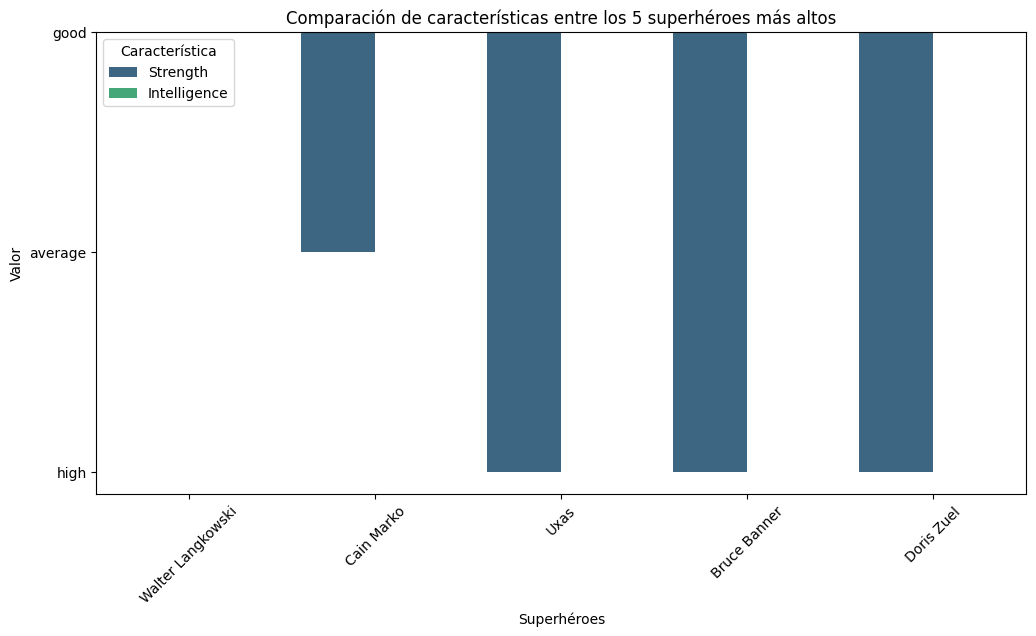

In [71]:
# Seleccionar las columnas necesarias para el análisis
columns_to_melt = ['Name', 'Strength', 'Intelligence', 'Height']
melted_df = df[columns_to_melt].copy()

# Ordenar por altura y seleccionar los 5 superhéroes más altos
top_5_tallest = melted_df.nlargest(5, 'Height')

# Reestructurar el DataFrame con pd.melt()
melted_df = pd.melt(
    top_5_tallest,
    id_vars=['Name'],
    value_vars=['Strength', 'Intelligence'],
    var_name='Characteristic',
    value_name='Value'
)

# Crear un gráfico para comparar las características
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Value', hue='Characteristic', data=melted_df, palette='viridis')
plt.title('Comparación de características entre los 5 superhéroes más altos')
plt.xlabel('Superhéroes')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(title='Característica')
plt.show()


In [73]:
import numpy as np

## 22. Implementa una función que normalice los valores de fuerza e inteligencia a una escala de 0 a 1, y luego crea un gráfico de radar para comparar estos atributos entre 3 superhéroes de tu elección.

C:\Users\Dani\AppData\Local\Temp\ipykernel_10344\2933760885.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))


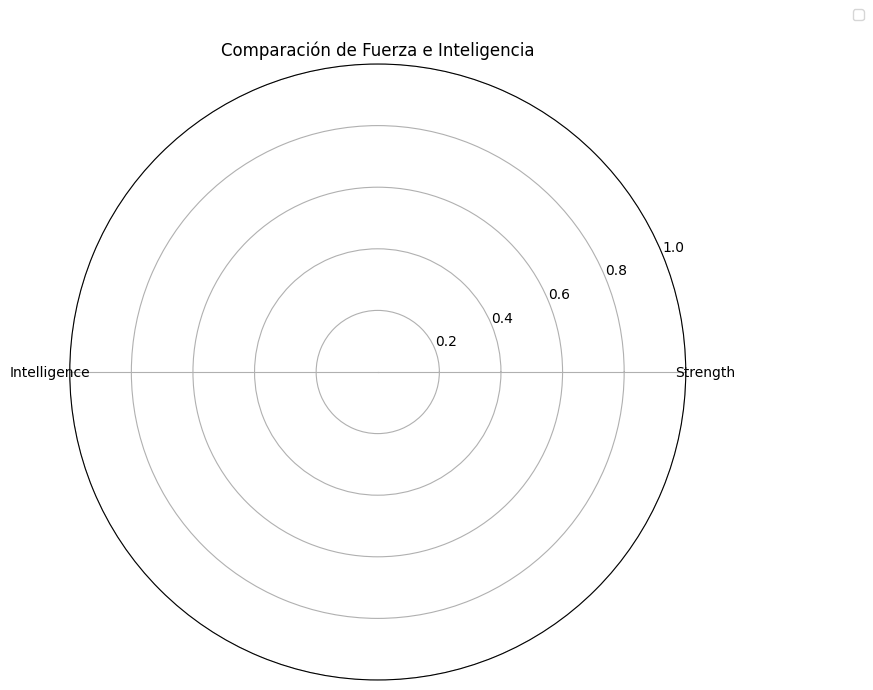

In [ ]:
# Convertir las columnas a numéricas
df['Strength'] = pd.to_numeric(df['Strength'], errors='coerce')
df['Intelligence'] = pd.to_numeric(df['Intelligence'], errors='coerce')

# Función para normalizar los valores a una escala de 0 a 1
def normalize_column(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Normalizar las columnas 'Strength' e 'Intelligence'
df['Normalized Strength'] = normalize_column(df, 'Strength')
df['Normalized Intelligence'] = normalize_column(df, 'Intelligence')

# Seleccionar 3 superhéroes para el radar (reemplaza con tus nombres preferidos)
selected_heroes = ['Zoom', 'Abraxas', 'Wolverine']  # Asegúrate de que existan en el dataset
radar_data = df[df['Name'].isin(selected_heroes)][['Name', 'Normalized Strength', 'Normalized Intelligence']]

# Preparar datos para el gráfico de radar
categories = ['Strength', 'Intelligence']
labels = radar_data['Name']
values = radar_data[['Normalized Strength', 'Normalized Intelligence']].values

# Crear el gráfico de radar
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Cerrar el gráfico

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for i, hero_values in enumerate(values):
    hero_values = np.append(hero_values, hero_values[0])  # Cerrar el gráfico
    ax.plot(angles, hero_values, label=labels.iloc[i])
    ax.fill(angles, hero_values, alpha=0.25)

ax.set_title('Comparación de Fuerza e Inteligencia')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

## 23. Realiza un análisis de series temporales basado en la columna 'First appearance'. Muestra cómo ha evolucionado la introducción de nuevos superhéroes a lo largo del tiempo.

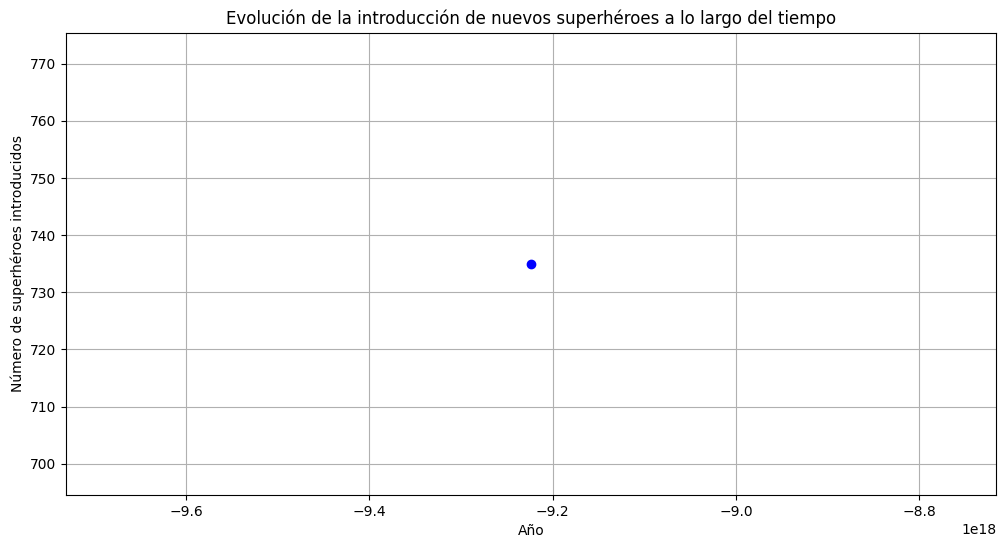

In [80]:
# Convertir la columna 'First appearance' a numérico (solo año)
df['Year'] = pd.to_numeric(df['First appearance'], errors='coerce')

# Contar el número de superhéroes introducidos por año
yearly_heroes = df['Year'].value_counts().sort_index()

# Crear un gráfico de líneas para visualizar la tendencia
plt.figure(figsize=(12, 6))
plt.plot(yearly_heroes.index, yearly_heroes.values, marker='o', linestyle='-', color='b')
plt.title('Evolución de la introducción de nuevos superhéroes a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Número de superhéroes introducidos')
plt.grid(True)
plt.show()


## 24. Crea un gráfico de burbujas que represente simultáneamente la altura (eje x), el peso (eje y), la fuerza (tamaño de la burbuja) y el género (color de la burbuja) de los superhéroes.

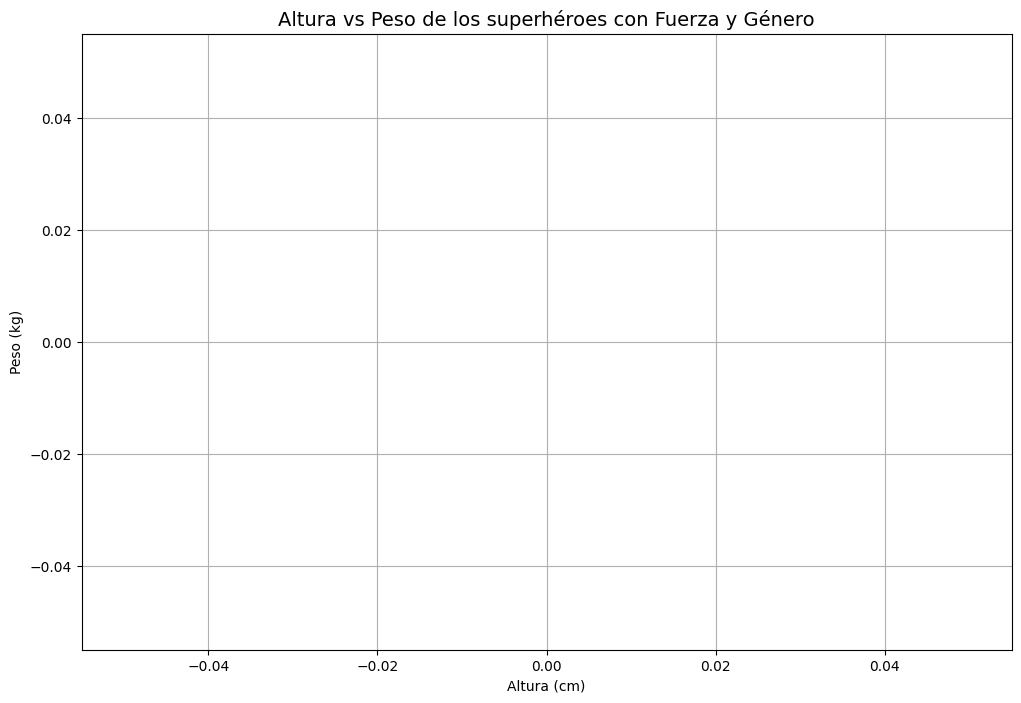

In [83]:
# Asegurar que las columnas relevantes sean numéricas
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Strength'] = pd.to_numeric(df['Strength'], errors='coerce')

# Asignar colores según el género
gender_colors = {'M': 'blue', 'F': 'pink', 'Other': 'green'}
df['Color'] = df['Gender'].map(gender_colors).fillna('gray')  # Colores para géneros desconocidos

# Crear el gráfico de burbujas
plt.figure(figsize=(12, 8))
plt.scatter(
    df['Height'], 
    df['Weight'], 
    s=df['Strength'],  # Tamaño de la burbuja según la fuerza
    c=df['Color'], 
    alpha=0.6, 
    edgecolors='w'
)

# Configurar etiquetas y título
plt.title('Altura vs Peso de los superhéroes con Fuerza y Género', fontsize=14)
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.grid(True)
plt.show()

## 25. Implementa una función que genere un "perfil de superhéroe" para cualquier nombre dado, mostrando todas sus características en un formato visualmente atractivo (puedes usar subplots de matplotlib para esto)

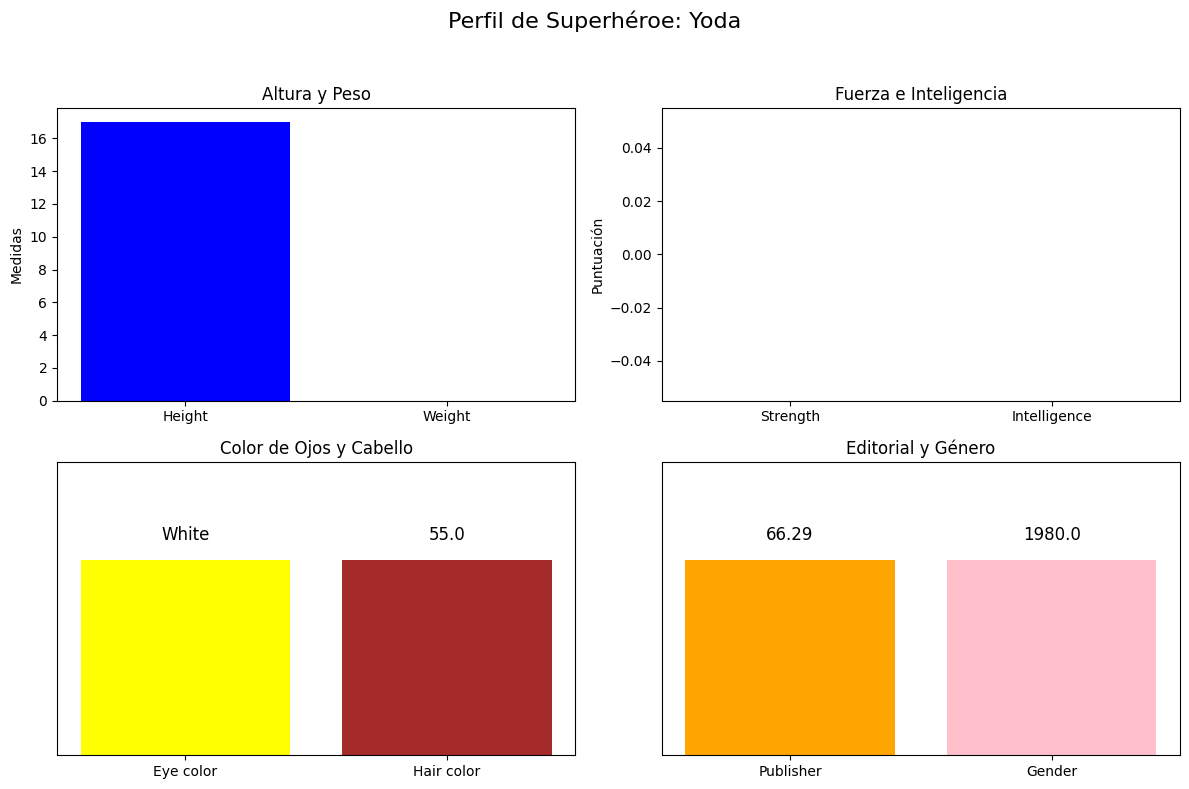

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un mapeo para la columna 'Intelligence' si es texto
def convert_intelligence_to_numeric(df):
    intelligence_map = {'low': 1, 'average': 2, 'moderate': 3, 'good': 4, 'high': 5}
    df['Intelligence_numeric'] = df['Intelligence'].map(intelligence_map).fillna(0)
    return df

# Supongamos que el DataFrame ya tiene datos cargados
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Strength'] = pd.to_numeric(df['Strength'], errors='coerce')
df = convert_intelligence_to_numeric(df)

def superhero_profile(df, superhero_name):
    # Filtrar los datos del superhéroe
    hero_data = df[df['Name'] == superhero_name]
    
    if hero_data.empty:
        print(f"No se encontró información para el superhéroe: {superhero_name}")
        return

    hero_data = hero_data.iloc[0]  # Obtener la fila como una serie

    # Manejar valores nulos con valores predeterminados
    height = hero_data['Height'] if not pd.isna(hero_data['Height']) else 0
    weight = hero_data['Weight'] if not pd.isna(hero_data['Weight']) else 0
    strength = hero_data['Strength'] if not pd.isna(hero_data['Strength']) else 0
    intelligence = hero_data['Intelligence_numeric']

    # Crear subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f"Perfil de Superhéroe: {superhero_name}", fontsize=16)

    # Altura y Peso
    axs[0, 0].bar(['Height', 'Weight'], [height, weight], color=['blue', 'green'])
    axs[0, 0].set_title('Altura y Peso')
    axs[0, 0].set_ylabel('Medidas')

    # Fuerza e Inteligencia
    axs[0, 1].bar(['Strength', 'Intelligence'], [strength, intelligence], color=['red', 'purple'])
    axs[0, 1].set_title('Fuerza e Inteligencia')
    axs[0, 1].set_ylabel('Puntuación')

    # Color de ojos y cabello
    eye_color = hero_data['Eye color'] if not pd.isna(hero_data['Eye color']) else 'Unknown'
    hair_color = hero_data['Hair color'] if not pd.isna(hero_data['Hair color']) else 'Unknown'
    axs[1, 0].bar(['Eye color', 'Hair color'], [1, 1], color=['yellow', 'brown'])
    axs[1, 0].text(0, 1.1, eye_color, ha='center', fontsize=12, color='black')
    axs[1, 0].text(1, 1.1, hair_color, ha='center', fontsize=12, color='black')
    axs[1, 0].set_title('Color de Ojos y Cabello')
    axs[1, 0].set_ylim(0, 1.5)
    axs[1, 0].get_yaxis().set_visible(False)

    # Editorial y Género
    publisher = hero_data['Publisher'] if not pd.isna(hero_data['Publisher']) else 'Unknown'
    gender = hero_data['Gender'] if not pd.isna(hero_data['Gender']) else 'Unknown'
    axs[1, 1].bar(['Publisher', 'Gender'], [1, 1], color=['orange', 'pink'])
    axs[1, 1].text(0, 1.1, publisher, ha='center', fontsize=12, color='black')
    axs[1, 1].text(1, 1.1, gender, ha='center', fontsize=12, color='black')
    axs[1, 1].set_title('Editorial y Género')
    axs[1, 1].set_ylim(0, 1.5)
    axs[1, 1].get_yaxis().set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar diseño para el título
    plt.show()

superhero_profile(df, 'Yoda')  
